**Name - Vinayak Bhat**

**Subgroup - 3Q11**

**Roll No. - 102317293**

Q1

Q1. Dataset

Use the SMS Spam Collection Dataset
(Source: UCI / Kaggle → spam.csv)

Task Classify SMS messages as:

•	spam (1)

•	ham (0) — not spam

Data Description

Column	Meaning

label	spam / ham

text	SMS message content

There are ~5,500 messages

Part A — Data Preprocessing & Exploration

1.	Load the SMS spam dataset

2.	Convert label: "spam" → 1, "ham" → 0

3.	Text preprocessing:

o	Lowercase

o	Remove punctuation

o	Remove stopwords

4.	Convert text to numeric feature vectors using TF-IDF vectorizer

5.	Train–test split (80/20)

6.	Show class distribution

Part B — Weak Learner Baseline

Train a Decision Stump:

DecisionTreeClassifier(max_depth=1)

Report:

•	Train accuracy

•	Test accuracy

•	Confusion matrix

•	Comment on why stump performance is weak on text data

Part C — Manual AdaBoost (T = 15 rounds)

Implement AdaBoost from scratch and after each iteration, print:

•	Iteration number

•	Misclassified sample indices

•	Weights of misclassified samples

•	Alpha value

Then update and normalize weights.

Also produce:

•	Plot: iteration vs weighted error

•	Plot: iteration vs alpha

Finally report:

•	Train accuracy

•	Test accuracy

•	Confusion matrix

•	Short interpretation of weight evolution

Part D — Sklearn AdaBoost

Train:
AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.6
)

Report:

•	Train accuracy

•	Test accuracy

•	Confusion matrix

•	Compare performance with manual implementation


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import make_pipeline # Added this import

In [ ]:
df=pd.read_csv('/content/spam.csv', encoding='latin1')

In [ ]:
print(df.head())
print(df.shape)

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
(5572, 5)


In [ ]:
df=df.dropna(axis=1)

In [ ]:
print(df.head())
print(df.shape)
print(df.columns)

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)
Index(['v1', 'v2'], dtype='object')


In [ ]:
df['v1'] = df['v1'].str.strip().str.lower()
df['v1']=df['v1'].map({'ham':0,'spam':1})
print(df.head())

   v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro...


Text Preprocessing:

In [ ]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def pre_process(text):
  text=text.lower() #lowercase
  text = re.sub(r'[^a-z0-9 ]', ' ', text ) #keep only words and numbers to remove punctuation
  words=text.split()
  words=[word for word in words if word not in stop_words] #removed stopwords
  text=' '.join(words)
  return text


In [ ]:
df['v2']=df['v2'].astype(str).apply(pre_process)

In [ ]:
print(df.head())

   v1                                                 v2
0   0  go jurong point crazy available bugis n great ...
1   0                            ok lar joking wif u oni
2   1  free entry 2 wkly comp win fa cup final tkts 2...
3   0                u dun say early hor u c already say
4   0             nah think goes usf lives around though


In [ ]:
df['v1'].value_counts()

,count
v1,
0,4825
1,747


In [ ]:
#first doing split before applying tf-idf to prevent leakage of data from test set
X_train, X_test, y_train, y_test = train_test_split(df['v2'],df['v1'],test_size=0.2, random_state=42)

In [ ]:
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [ ]:
#show class distribution
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 3860, 1: 597})
Counter({0: 965, 1: 150})


Train Accuracy: 0.8842270585595692
Test Accuracy: 0.8932735426008969
confusion matrix for testing:



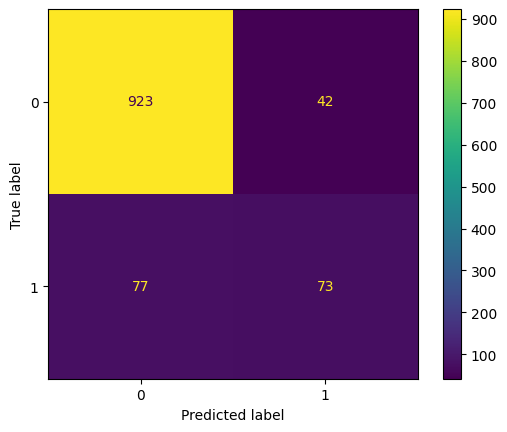

In [ ]:
from sklearn.tree import DecisionTreeClassifier
stump=DecisionTreeClassifier(max_depth=1)
stump.fit(X_train_tfidf, y_train)

y_train_pred = stump.predict(X_train_tfidf)
y_test_pred = stump.predict(X_test_tfidf)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

print('confusion matrix for testing:\n')
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
disp.plot()
plt.show()

A decision stump is too simple for text because it can only split on one word.
TF-IDF creates thousands of word features, and spam/ham classification needs multiple signals.
Since the stump cannot combine multiple words, it performs poorly and underfits the data.

Manual AdaBoost

In [ ]:
def adaboost(T=15):
  #initialize weights
  N = X_train_tfidf.shape[0] #total no of rows
  weights = np.ones(N)/N #equal weight assigned to each sample and sum of all is 1
  alphas=[] #performance of the stumps
  errors=[] #total errors
  stumps=[] #stores all weak classifiers
  for t in range(1,T+1):
    print(f'iteration: {t}')

    stump_t = DecisionTreeClassifier(max_depth=1)
    # Use y_train.values to ensure consistent array-like input, preventing Pandas Series index issues
    stump_t.fit(X_train_tfidf, y_train.values, sample_weight=weights)
    pred=stump_t.predict(X_train_tfidf) # pred is numpy array
    stumps.append(stump_t)
    # Ensure comparisons are with numpy arrays to get numpy boolean arrays
    misclassified_mask=(pred!=y_train.values)
    mis_idx=np.where(misclassified_mask)[0] # indices of wrong predictions

    error_t = np.sum(weights[mis_idx]) # summation of all the sample weights of misclassified data points.
    errors.append(error_t)

    #print('Misclassified sample indices:', mis_idx)
    # print('Weights of misclassified samples:', weights[mis_idx])
    print(f'error{t}: {error_t}')

    # Handle the case where error_t is 0 or 1 to avoid log(0) or log of negative
    epsilon = 1e-10
    error_t = np.clip(error_t, epsilon, 1 - epsilon) # Clip error_t to avoid log issues

    alpha_t = 0.5*np.log((1-error_t)/error_t) #formula for performance
    alphas.append(alpha_t)
    print(f'alpha{t}: {alpha_t}')

    #update weights
    # Ensure this operation uses numpy arrays throughout
    exponent_term = -alpha_t * ((pred == y_train.values) * 2 - 1)
    weights = weights * np.exp(exponent_term)

    weights = weights/np.sum(weights) #normalize
  return alphas, errors, stumps

In [ ]:
y_train_signed = np.where(y_train.values == 0, -1, 1)
train_scores = np.zeros(X_train_tfidf.shape[0])

alphas, errors, stumps = adaboost(T=15)

for alpha, stump in zip(alphas, stumps):
  pred = stump.predict(X_train_tfidf)
  pred_signed= np.where(pred == 0, -1, 1)
  train_scores += alpha * pred_signed
y_train_final = np.where(train_scores>=0, 1,0)

iteration: 1
error1: 0.11577294144043081
alpha1: 1.0165415058567204
iteration: 2
error2: 0.2543782910330475
alpha2: 0.5376979426080197
iteration: 3
error3: 0.34306643420629934
alpha3: 0.32482939085728285
iteration: 4
error4: 0.3499452577916881
alpha4: 0.309639921092122
iteration: 5
error5: 0.43478929143482836
alpha5: 0.13116853545391932
iteration: 6
error6: 0.40609197356624377
alpha6: 0.19007239994832287
iteration: 7
error7: 0.4210992545018325
alpha7: 0.15913123703040716
iteration: 8
error8: 0.41202178257109223
alpha8: 0.17780684187668958
iteration: 9
error9: 0.4277160642604796
alpha9: 0.14558784259911195
iteration: 10
error10: 0.4246154053773086
alpha10: 0.15192742335899465
iteration: 11
error11: 0.4358414786998267
alpha11: 0.12902834093384055
iteration: 12
error12: 0.4332860049750451
alpha12: 0.13422836449625858
iteration: 13
error13: 0.4413000187204493
alpha13: 0.11794383213065157
iteration: 14
error14: 0.43337979647835556
alpha14: 0.13403738627662473
iteration: 15
error15: 0.442635

In [ ]:
y_test_signed = np.where(y_test.values == 0, -1, 1)
test_scores = np.zeros((X_test_tfidf.shape[0]))

for alpha, stump in zip(alphas, stumps):
    pred = stump.predict(X_test_tfidf)
    pred_signed = np.where(pred == 1, 1, -1)
    test_scores += alpha * pred_signed

y_test_final = np.where(test_scores >= 0, 1, 0)


Final Train Accuracy: 0.9214718420462195
Final Test Accuracy: 0.9246636771300448


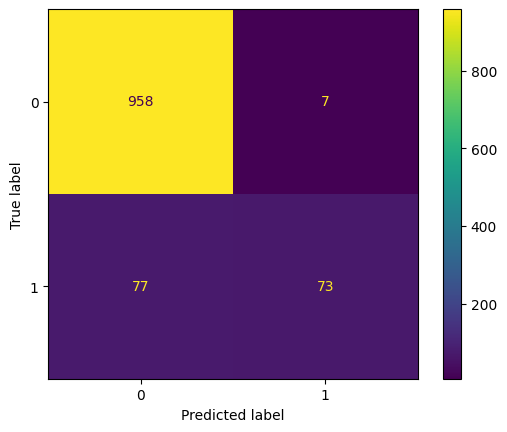

In [ ]:
train_acc = accuracy_score(y_train, y_train_final)
test_acc = accuracy_score(y_test, y_test_final)

print("Final Train Accuracy:", train_acc)
print("Final Test Accuracy:", test_acc)

disp=ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_final))
disp.plot()
plt.show()

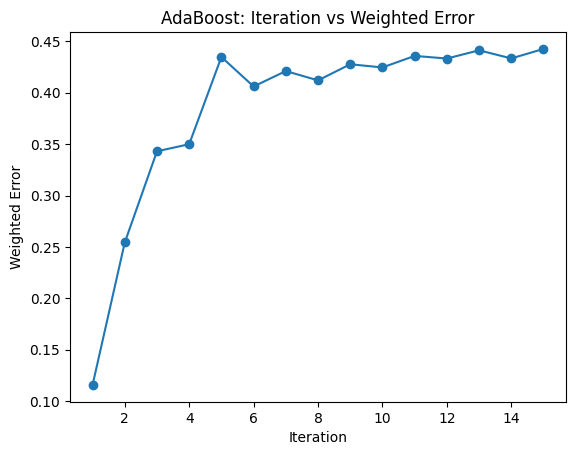

In [ ]:
plt.plot(range(1, 16), errors, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Weighted Error")
plt.title("AdaBoost: Iteration vs Weighted Error")
plt.show()


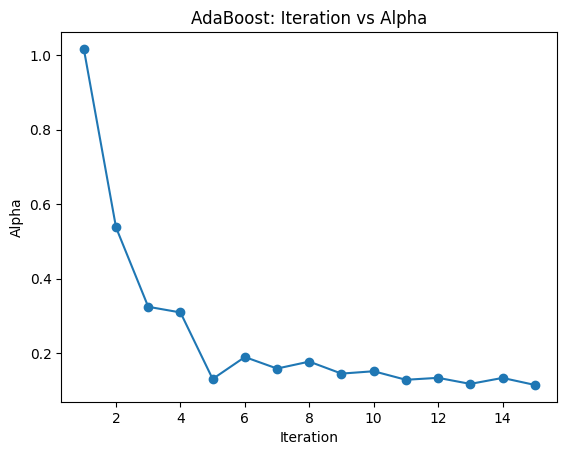

In [ ]:
plt.plot(range(1, 16), alphas, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Alpha")
plt.title("AdaBoost: Iteration vs Alpha")
plt.show()


In the first iteration, the weak learner has a low error, so AdaBoost assigns it a high weight (large α). This means the first stump contributes strongly to the final model.
As iterations continue, the errors rise and stay close to 0.3–0.45, meaning later stumps are only slightly better than random. Because of this, their weights become smaller, showing that they have less influence.
Overall, the weight evolution indicates that AdaBoost quickly learns the easy patterns in the data but struggles with the harder points later, causing the contribution of each new stump to decrease.

Sklearn AdaBoost

Train Accuracy : 0.9194525465559794
Test Accuracy  : 0.9246636771300448

Confusion Matrix:



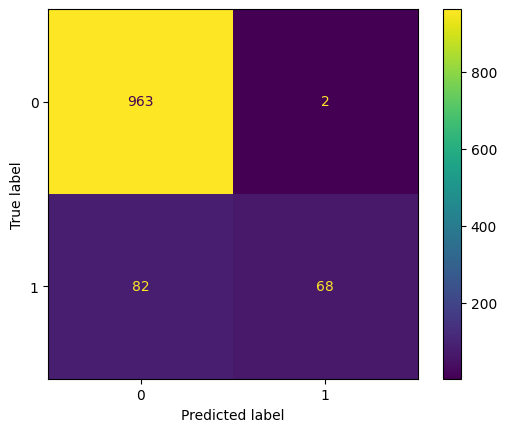

In [ ]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.6
)

ada.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred = ada.predict(X_train_tfidf)
y_test_pred  = ada.predict(X_test_tfidf)

# Accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)


print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
# Confusion matrix
print("\nConfusion Matrix:\n")
disp= ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
disp.plot()
plt.show()

Both the manual AdaBoost (15 stumps) and sklearn AdaBoost (100 stumps) achieve almost the same accuracy because, on TF-IDF text data, decision stumps are extremely weak learners. The dataset is easy, and the strongest improvements in boosting happen in the first few iterations. Additional stumps contribute very little because remaining samples are inherently hard to classify. Therefore, performance saturates early, and both models converge to similar accuracy.

#Q2


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
X.shape

(303, 13)

In [ ]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [ ]:
y_binary = (y['num'] > 0).astype(int)
y_binary

,num
0,0
1,1
2,1
3,0
4,0
...,...
298,1
299,1
300,1
301,1


In [ ]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
num_cols = ['age','trestbps','chol','thalach','oldpeak']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
#defining model with just one stump
model_stump = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', stump)
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

Training accuracy: 0.7479338842975206
Test accuracy: 0.8032786885245902

Confusion Matrix:


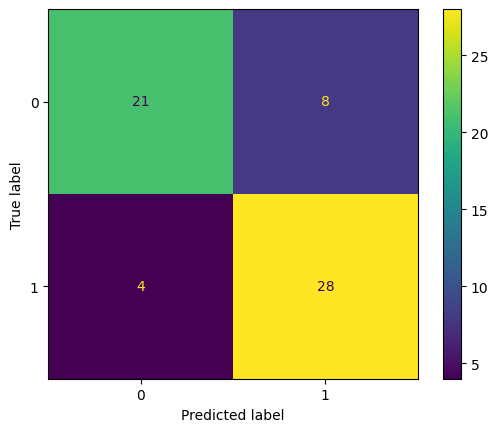


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [ ]:
model_stump.fit(X_train, y_train)
y_pred_train=model_stump.predict(X_train)
y_pred_test=model_stump.predict(X_test)
print("Training accuracy:", accuracy_score(y_train, y_pred_train))
print("Test accuracy:", accuracy_score(y_test, y_pred_test))

print("\nConfusion Matrix:")
disp=ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test))
disp.plot()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

A decision stump is an extremely weak model because it makes only one split on a single feature, ignoring all other information in the dataset. Heart disease prediction, however, depends on the interaction of multiple medical factors such as age, chest pain type, cholesterol, thal, and exercise-induced angina. With only one decision boundary, the stump suffers from high bias and severe underfitting, leading to lower accuracy and poor recall for disease cases. It fails to capture non-linear patterns and multi-feature relationships that are essential for medical diagnosis.

In [ ]:
# Fit ONLY on training data
X_train_transformed = preprocess.fit_transform(X_train)

# Transform test data
X_test_transformed = preprocess.transform(X_test)

In [ ]:
n_estimators_list = [5, 10, 25, 50, 100]
learning_rates = [0.1, 0.5, 1.0]
best_acc = 0
best_model = None
best_params = None

results = {lr: [] for lr in learning_rates}

for n in n_estimators_list:
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n,
            learning_rate=lr
        )
        model.fit(X_train_transformed, y_train)

        acc = model.score(X_test_transformed, y_test)
        results[lr].append(acc)

        if acc > best_acc:
            best_acc = acc
            best_model = model
            best_params = (n, lr)

print("Best accuracy:", best_acc)
print("Best parameters:", best_params)


Best accuracy: 0.9016393442622951
Best parameters: (5, 0.1)


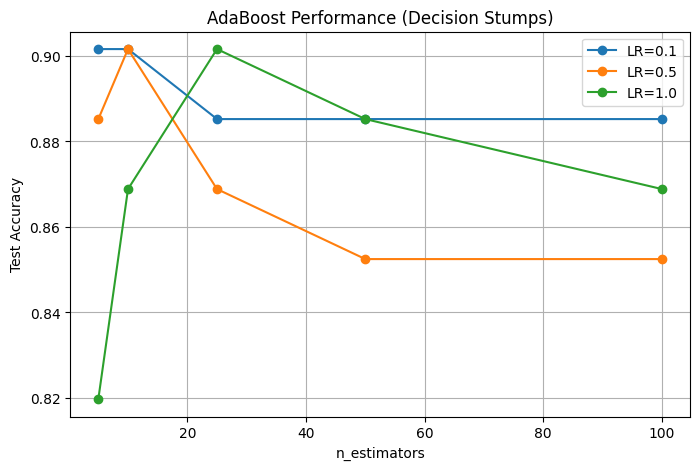

In [ ]:
plt.figure(figsize=(8, 5))

for lr in learning_rates:
    plt.plot(n_estimators_list, results[lr], marker="o", label=f"LR={lr}")

plt.xlabel("n_estimators")
plt.ylabel("Test Accuracy")
plt.title("AdaBoost Performance (Decision Stumps)")
plt.legend()
plt.grid(True)
plt.show()


PART C

In [ ]:
best_lr = 0.1
best_n  = 5

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=best_n,
    learning_rate=best_lr
)

pipe = make_pipeline(preprocess, ada)
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    learning_rate=0.1, n_estimators=5))])

In [ ]:
model = pipe.named_steps["adaboostclassifier"]

weak_errors = model.estimator_errors_          # ε_t
weak_alphas = model.estimator_weights_         # α_t

print("Weak learner errors:", weak_errors)
print("Estimator weights:", weak_alphas)


# Transform X_train the same way AdaBoost sees it to get per sample weights
X_train_transformed = pipe.named_steps["columntransformer"].transform(X_train)
y_train_arr = y_train.values

N = len(y_train_arr)
weights = np.ones(N) / N   # initial uniform weights

for stump, alpha in zip(model.estimators_, model.estimator_weights_):
    pred = stump.predict(X_train_transformed)
    incorrect = (pred != y_train_arr)
    weights *= np.exp(alpha * incorrect)
    # Normalize final weights
    weights /= weights.sum()

final_sample_weights = weights
print("Final sample weights (first 20):")
print(final_sample_weights[:20])

Weak learner errors: [0.25206612 0.25821562 0.27517596 0.27506027 0.28112972]
Estimator weights: [0.10876232 0.10552636 0.09685182 0.09690983 0.09388647]
Final sample weights (first 20):
[0.00359459 0.00483438 0.00396038 0.00359459 0.00593797 0.00396038
 0.00359459 0.00438787 0.00359459 0.00396038 0.00593797 0.00359459
 0.00441517 0.00441517 0.00441517 0.00483438 0.00359459 0.00441517
 0.00359459 0.00396038]


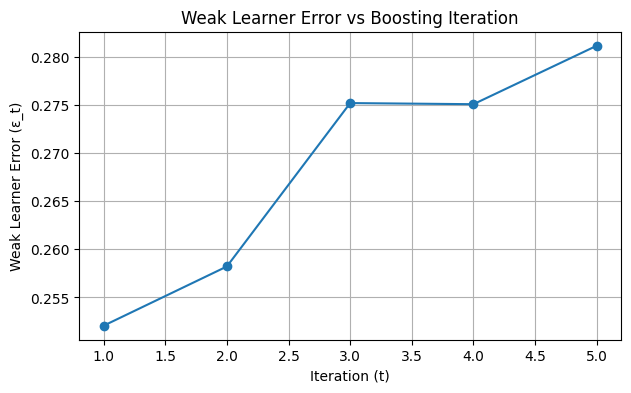

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(range(1, best_n+1), weak_errors, marker='o')
plt.xlabel("Iteration (t)")
plt.ylabel("Weak Learner Error (ε_t)")
plt.title("Weak Learner Error vs Boosting Iteration")
plt.grid(True)
plt.show()

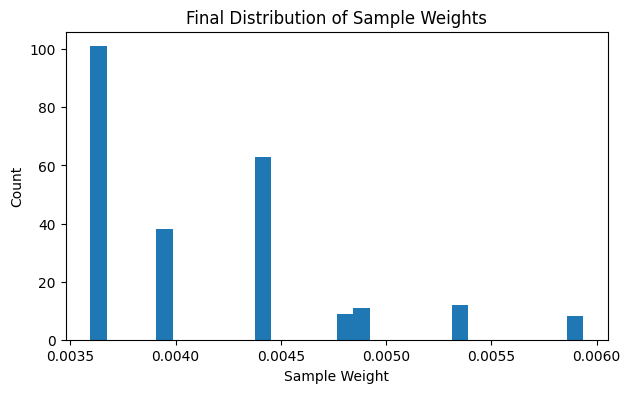

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(final_sample_weights, bins=30)
plt.xlabel("Sample Weight")
plt.ylabel("Count")
plt.title("Final Distribution of Sample Weights")
plt.show()

The samples that received the highest final weights are the ones that the weak learners (decision stumps) kept misclassifying repeatedly across many boosting iterations.
In AdaBoost, whenever a sample is misclassified in an iteration, its weight is multiplied by 𝑒^𝛼𝑡, causing it to grow larger each round.
So the points with weights around 0.0055–0.0060 are the hardest samples—those which multiple stumps consistently failed to classify correctly.

AdaBoost focuses on them because it adaptively increases their importance so that later weak learners try harder to correctly classify these difficult points, improving the overall ensemble performance.

In [ ]:
# 1. Extract feature importance from AdaBoost
importances = model.feature_importances_

# Get feature names from ColumnTransformer
num_features = num_cols
cat_features = pipe.named_steps['columntransformer']\
                          .named_transformers_['cat']\
                          .get_feature_names_out(cat_cols)

all_features = np.concatenate([num_features, cat_features])

# 2. Find top 5 most important features
indices = np.argsort(importances)[::-1]   # sorted descending
top5_idx = indices[:5]
top5_features = all_features[top5_idx]
top5_scores = importances[top5_idx]

print("Top 5 important features:")
for f, s in zip(top5_features, top5_scores):
    print(f"{f}: {s:.4f}")

Top 5 important features:
cp_4: 0.4096
thal_3.0: 0.3973
ca_0.0: 0.1931
thal_7.0: 0.0000
ca_nan: 0.0000


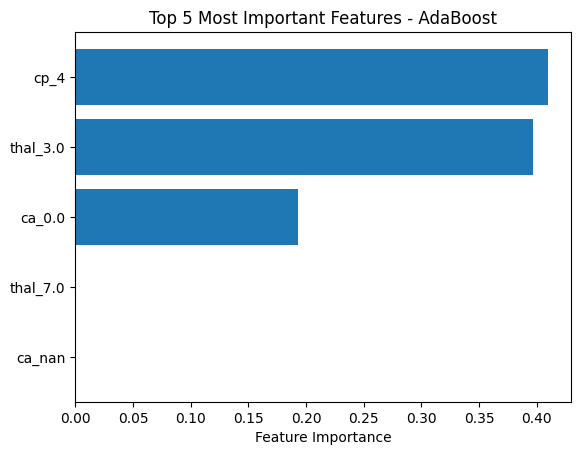

In [ ]:
# 3. Plot feature importance bar graph
#plt.figure(figsize=(10, 6))
plt.barh(top5_features[::-1], top5_scores[::-1])  # reverse for descending top-to-bottom
plt.xlabel("Feature Importance")
plt.title("Top 5 Most Important Features - AdaBoost")
plt.show()

oldpeak: Indicates ST-segment depression during exercise, a strong sign of reduced blood flow to the heart (ischemia).

thalach: Lower maximum heart rate reflects poor cardiac response to stress, often due to blocked coronary arteries.

trestbps: High resting blood pressure increases strain on the heart and accelerates artery damage, raising heart disease risk.

chol: High cholesterol promotes plaque buildup in coronary arteries, restricting blood flow and causing heart disease.

age: Heart disease risk rises with age due to arterial stiffening and long-term plaque accumulation.

#Q3

In [ ]:
df= pd.read_csv('/content/test.csv')

In [ ]:
print(df.head())
print(df.shape)
print(df['Activity'].value_counts())
print(df['Activity'].unique())

   acc_x  acc_y  acc_z    timestamp  Activity
0  -1.31  10.61  -0.69  2696.602336         0
1  -1.14   9.38   1.46  2696.652293         0
2  -0.34   9.43   0.42  2696.702312         0
3  -0.34  10.46  -0.89  2696.752269         0
4   1.12  10.23  -1.53  2696.802318         0
(225713, 5)
Activity
5    93686
1    62866
4    30115
0    20783
2    10086
3     8177
Name: count, dtype: int64
[0 1 2 3 4 5]


In [ ]:
df['Activity'] = df['Activity'].map({
    1: 1,   # Jogging
    2: 1,   # Upstairs
    0: 0,   # Walking
    3: 0,   # Downstairs
    4: 0,   # Sitting
    5: 0    # Standing
})



print(df['Activity'].value_counts())

Activity
0    152761
1     72952
Name: count, dtype: int64


In [ ]:
# Features and target
X = df[['acc_x','acc_y','acc_z']]
y = df['Activity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale accel features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train_scaled, y_train)

train_pred = stump.predict(X_train_scaled)
test_pred  = stump.predict(X_test_scaled)

print("Train accuracy:", accuracy_score(y_train, train_pred))
print("Test accuracy:", accuracy_score(y_test, test_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, test_pred))
print("\nClassification report:\n", classification_report(y_test, test_pred))

Train accuracy: 0.7764542813562111
Test accuracy: 0.7761319668015477

Confusion matrix:
 [[43931  1897]
 [13262  8624]]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85     45828
           1       0.82      0.39      0.53     21886

    accuracy                           0.78     67714
   macro avg       0.79      0.68      0.69     67714
weighted avg       0.78      0.78      0.75     67714



A single decision stump uses only one feature & one threshold to classify data.
Human motion patterns, however, require combinations of X/Y/Z accelerations.
The stump cannot capture multi-axis relationships.
It cannot separate overlapping clusters of vigorous vs light motion.
Performance is high-bias and underfits the data.



In [ ]:
T = 20
n = len(X_train_scaled)

# Initial weight distribution
weights = np.ones(n) / n

estimators = []
alphas = []
errors = []

for t in range(T):
    stump = DecisionTreeClassifier(max_depth=1, random_state=42)
    stump.fit(X_train_scaled, y_train, sample_weight=weights)

    pred = stump.predict(X_train_scaled)
    incorrect = (pred != y_train)

    error = np.sum(weights * incorrect)
    errors.append(error)

    # to avoid divide-by-zero
    error = max(error, 1e-10)

    alpha = 0.5 * np.log((1 - error) / error)
    alphas.append(alpha)
    print(f"\nIteration {t+1}")
    print("Misclassified indices:", np.where(incorrect)[0][:10], "...")
    print("Weights of misclassified samples:", weights[incorrect][:5], "...\n")

    # Update weights
    weights *= np.exp(alpha * incorrect)
    weights /= weights.sum()

    estimators.append(stump)

# Boosted prediction function
def ada_predict(X):
    total = sum(alpha * est.predict(X) for est, alpha in zip(estimators, alphas))
    return (total >= 0.5).astype(int)

train_pred_boost = ada_predict(X_train_scaled)
test_pred_boost  = ada_predict(X_test_scaled)

print("Manual AdaBoost Train acc:", accuracy_score(y_train, train_pred_boost))
print("Manual AdaBoost Test acc:", accuracy_score(y_test, test_pred_boost))
print("\nConfusion matrix:\n", confusion_matrix(y_test, test_pred_boost))



Iteration 1
Misclassified indices: [ 6  7  9 16 17 18 27 40 42 53] ...
Weights of misclassified samples: [6.32915398e-06 6.32915398e-06 6.32915398e-06 6.32915398e-06
 6.32915398e-06] ...


Iteration 2
Misclassified indices: [ 6  7  9 16 17 18 24 27 30 40] ...
Weights of misclassified samples: 74348     0.00001
192600    0.00001
14535     0.00001
22376     0.00001
179505    0.00001
Name: Activity, dtype: float64 ...


Iteration 3
Misclassified indices: [ 0  6  7 10 16 20 32 33 37 40] ...
Weights of misclassified samples: 191125    0.000005
74348     0.000012
192600    0.000012
19070     0.000005
22376     0.000012
Name: Activity, dtype: float64 ...


Iteration 4
Misclassified indices: [ 0  6 10 17 18 32 33 37 40 42] ...
Weights of misclassified samples: 191125    0.000005
74348     0.000014
19070     0.000005
179505    0.000011
49433     0.000011
Name: Activity, dtype: float64 ...


Iteration 5
Misclassified indices: [ 0  6  7 10 16 32 33 37 40 42] ...
Weights of misclassified samples:

AdaBoost increases weight for misclassified samples, forcing future stumps to focus on them.
This makes the ensemble learn Hard boundaries, Rare patterns, and Minority edge cases

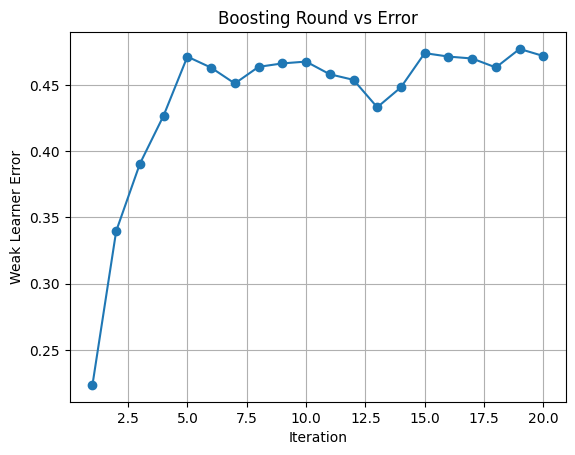

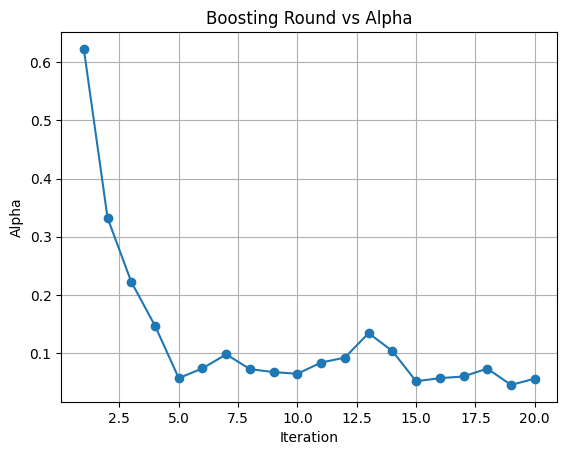

In [ ]:
plt.plot(range(1,T+1), errors, marker="o")
plt.xlabel("Iteration")
plt.ylabel("Weak Learner Error")
plt.title("Boosting Round vs Error")
plt.grid(True)
plt.show()

plt.plot(range(1,T+1), alphas, marker="o")
plt.xlabel("Iteration")
plt.ylabel("Alpha")
plt.title("Boosting Round vs Alpha")
plt.grid(True)
plt.show()


In [ ]:
sk_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

sk_model.fit(X_train_scaled, y_train)

train_pred2 = sk_model.predict(X_train_scaled)
test_pred2  = sk_model.predict(X_test_scaled)

print("Sklearn AdaBoost train acc:", accuracy_score(y_train, train_pred2))
print("Sklearn AdaBoost test acc:", accuracy_score(y_test, test_pred2))
print("\nConfusion:\n", confusion_matrix(y_test, test_pred2))

Sklearn AdaBoost train acc: 0.8060304179140374
Sklearn AdaBoost test acc: 0.8043093008831261

Confusion:
 [[43039  2789]
 [10462 11424]]
